In [56]:
# importando as lib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [57]:
# lendo os dados
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# registros iniciais
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [58]:
# verificando as dimensoes
print('Linhas: {}, Colunas: {}'.format(base_dados.shape[0],
                                       base_dados.shape[1]))

Linhas: 1034, Colunas: 9


In [59]:
# verificando a base de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [60]:
# verificando nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

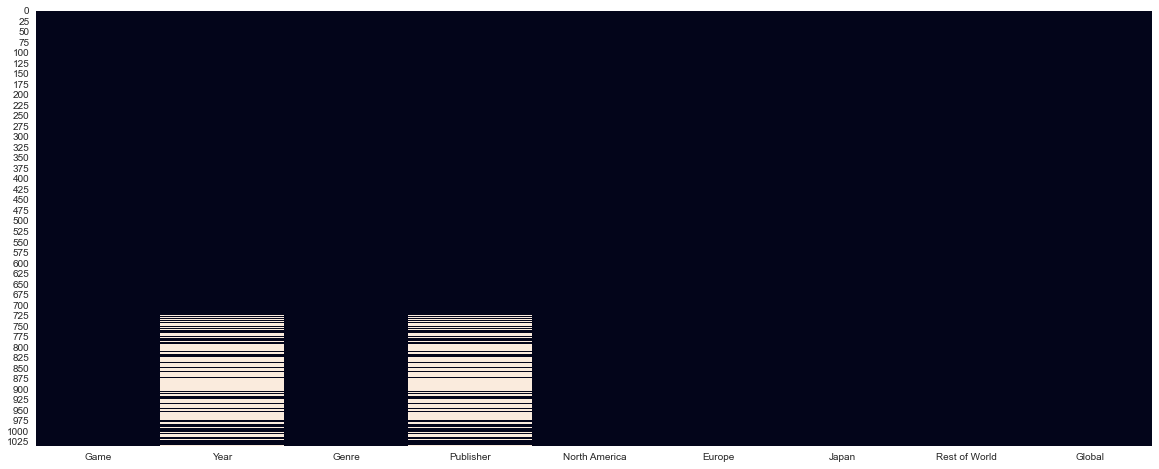

In [61]:
# grafico - nulos
plt.figure(figsize= (20,8))
sns.heatmap(base_dados.isnull(),cbar= False);

In [62]:
base_dados.dropna(inplace= True) 
# retirando os nulos da base de dados

In [63]:
# estatisticas
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


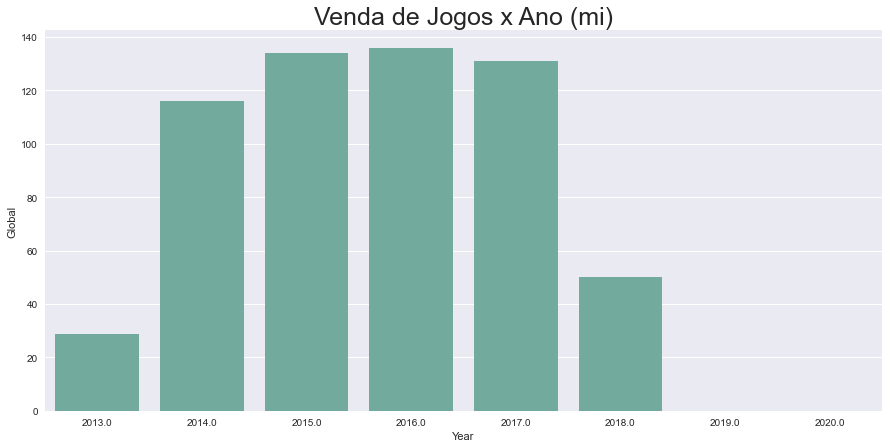

In [64]:
# gráfico barras - vendas por anos
plt.figure(figsize= (15,7))
plt.title('Venda de Jogos x Ano (mi)', fontsize= 25)
sns.barplot(data= base_dados,
            x='Year',
            y='Global',
            ci= None,
            color= '#69B3A2',
            estimator= sum);

In [65]:
base_dados = base_dados.loc[
    (base_dados['Year'] != 2019) & (base_dados['Year'] != 2020)
]
# retirando os anos 2019 e 2020.


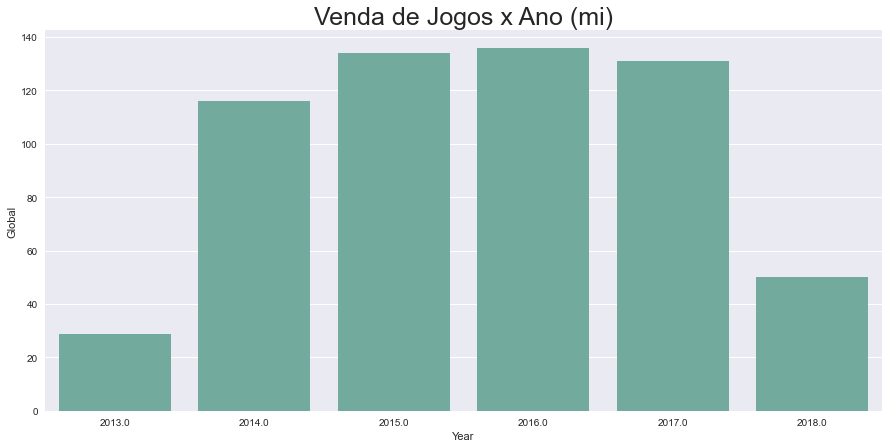

In [66]:
# gráfico barras - vendas por anos
plt.figure(figsize= (15,7))
plt.title('Venda de Jogos x Ano (mi)', fontsize= 25)
sns.barplot(data= base_dados,
            x='Year',
            y='Global',
            ci= None,
            color= '#69B3A2',
            estimator= sum);

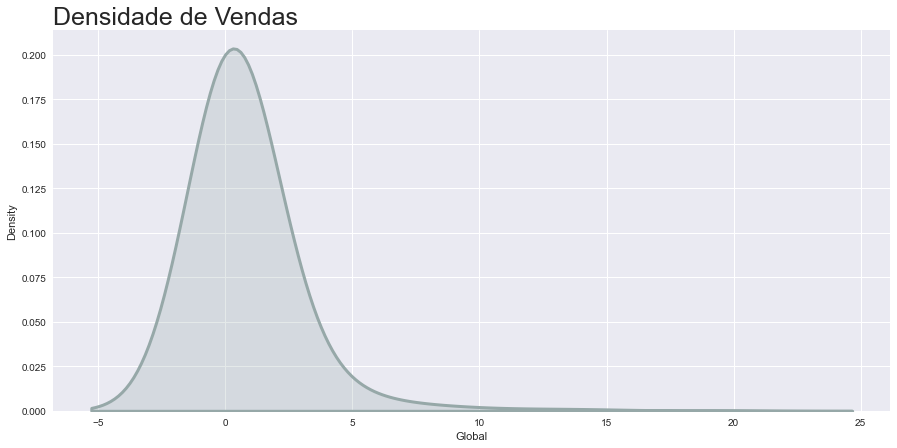

In [67]:
# Gráfico de densidade de vendas

plt.figure(figsize= (15,7))
plt.title('Densidade de Vendas', fontsize= 25, loc= 'left')
plt.style.use('ggplot')
sns.kdeplot(base_dados['Global'], # dados
            shade= True, # sombra
            bw=1, 
            color='#96A8A8', # cor
            linewidth=3); # tamanho a linha

In [68]:
base_dados.groupby(by= ['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


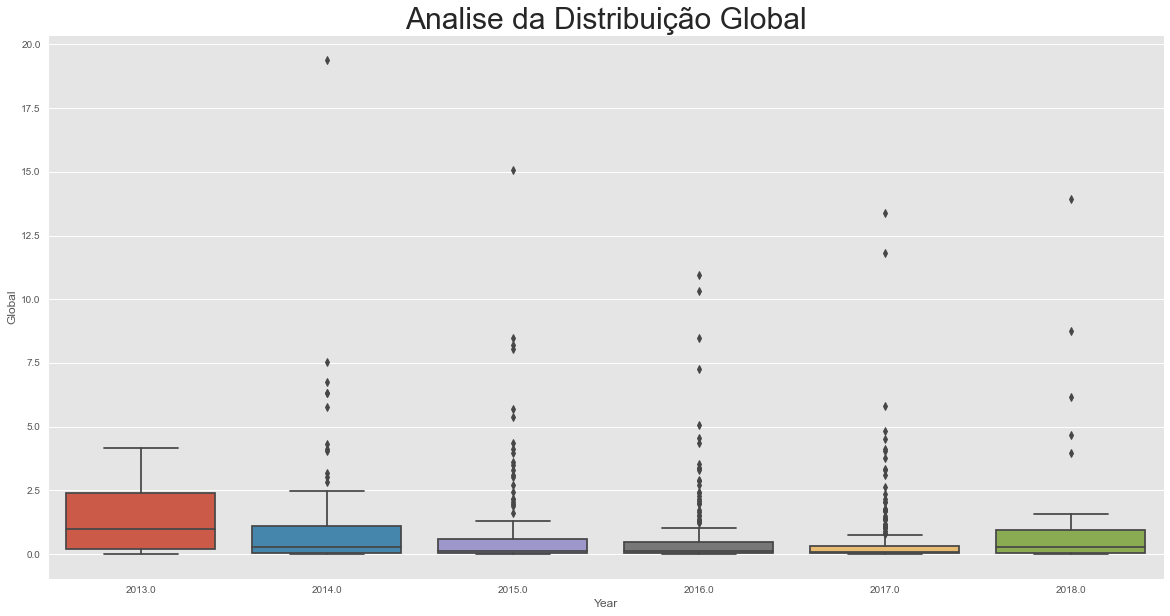

In [69]:
plt.figure(figsize= (20,10))
plt.title('Analise da Distribuição Global', fontsize= 30)
sns.boxplot(data= base_dados,
            x= 'Year',
            y= 'Global');

In [70]:
# jogos mais vendidos
base_dados[['Game','Genre','Year','Global']].sort_values(by= ['Global'], ascending= False).head(10)

,Game,Genre,Year,Global
0,Grand Theft Auto V,Action,2014.0,19.39
1,Call of Duty: Black Ops 3,Shooter,2015.0,15.09
2,Red Dead Redemption 2,Action-Adventure,2018.0,13.94
3,Call of Duty: WWII,Shooter,2017.0,13.40
4,FIFA 18,Sports,2017.0,11.80
5,FIFA 17,Sports,2016.0,10.94
6,Uncharted (PS4),Action,2016.0,10.33
7,Spider-Man (PS4),Action-Adventure,2018.0,8.76
8,Call of Duty: Infinite Warfare,Shooter,2016.0,8.48
9,Fallout 4,Role-Playing,2015.0,8.48


In [71]:
analise = base_dados.groupby(by= ['Year']).sum().reset_index()

# analisando a proporção 100% dos continentes

america_do_norte =  [america_do_norte / total * 100 for america_do_norte, total in zip(analise['North America'], analise['Global'])]
europa =            [europa / total * 100 for europa, total in zip(analise['Europe'], analise['Global'])]
japao =             [japao / total * 100 for japao, total in zip(analise['Japan'], analise['Global'])]
resto_do_mundo =    [resto_do_mundo / total * 100 for resto_do_mundo, total in zip(analise['Rest of World'], analise['Global'])]

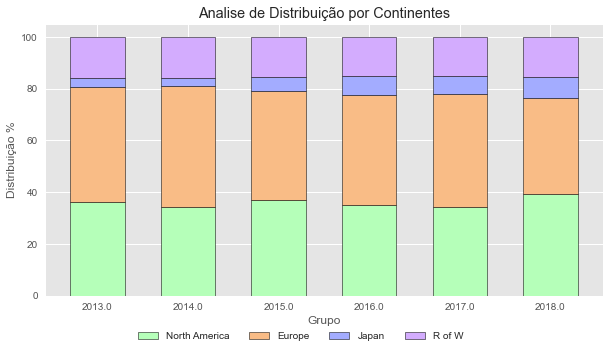

In [72]:
# grafico analise por continente

largura_barra = 0.6
rotulos = analise.Year
grupos = [0, 1, 2, 3, 4, 5]

plt.figure(figsize= (10,5))
plt.title('Analise de Distribuição por Continentes')

# plot america do norte
plt.bar(grupos, 
        america_do_norte, 
        width= largura_barra,
        color= '#B5FFB9',
        edgecolor= 'black')
# plot europa
plt.bar(grupos, 
        europa,
        bottom= america_do_norte,
        width= largura_barra,
        color= '#F9BC86',
        edgecolor= 'black')
# plot japão
plt.bar(grupos, 
        japao,
        bottom= [a + b for a, b in zip(america_do_norte, europa)],
        width= largura_barra,
        color= '#A3ACFF',
        edgecolor= 'black')
# plot resto do mundo
plt.bar(grupos, 
        resto_do_mundo,
        bottom= [a + b + c for a, b, c in zip(america_do_norte, europa, japao)],
        width= largura_barra,
        color= '#D3ACFE',
        edgecolor= 'black')

plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend(['North America', 'Europe','Japan', 'R of W'], loc= 'upper left',
           bbox_to_anchor= (0.15, -0.1), ncol=4);

In [73]:
base_dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [74]:
# %pip install sklearn
# instalando biblioteca que vai ser usada no ambiente
from sklearn.preprocessing import LabelEncoder

In [75]:
funcao_label = LabelEncoder()
# essa função irá numerar cada publisher com um numero de maneira dinamica

base_dados['Produtor'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game'])
base_dados.head(3)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521


In [76]:
lista_cores = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

paleta_cores = sns.color_palette(lista_cores[5], 8)
paleta_cores

[(0.02391387927720114, 0.4188389081122646, 0.38746635909265675),
 (0.26551326412918125, 0.6336793540945791, 0.5992310649750097),
 (0.5947712418300656, 0.8418300653594772, 0.8039215686274511),
 (0.8582083813917725, 0.9362552864282968, 0.9251057285659362),
 (0.9630142252979623, 0.9317954632833526, 0.8492887351018839),
 (0.9045751633986928, 0.8104575163398693, 0.5816993464052287),
 (0.7736255286428297, 0.5558631295655516, 0.23798539023452514),
 (0.5686274509803921, 0.3361014994232987, 0.0526720492118416)]

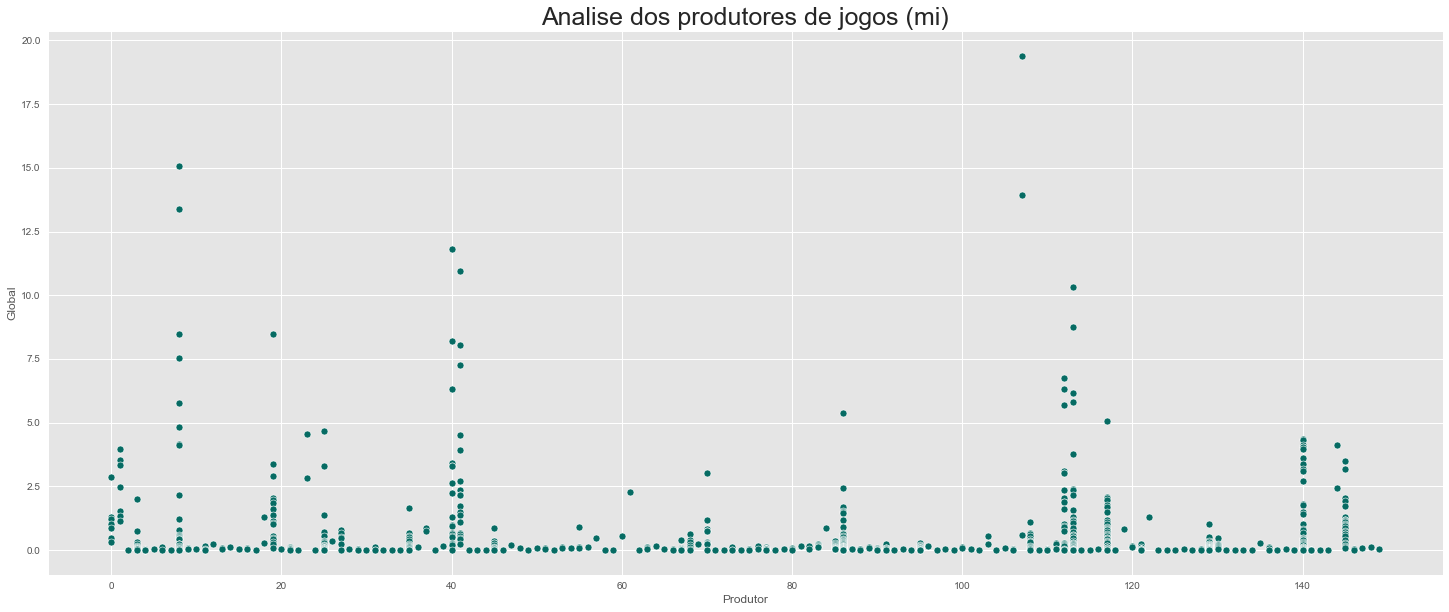

In [77]:
plt.figure(figsize= (25, 10))
plt.title('Analise dos produtores de jogos (mi)', fontsize= 25)
sns.scatterplot(data= base_dados, 
                x= 'Produtor', 
                y= 'Global', 
                color= paleta_cores[0]);

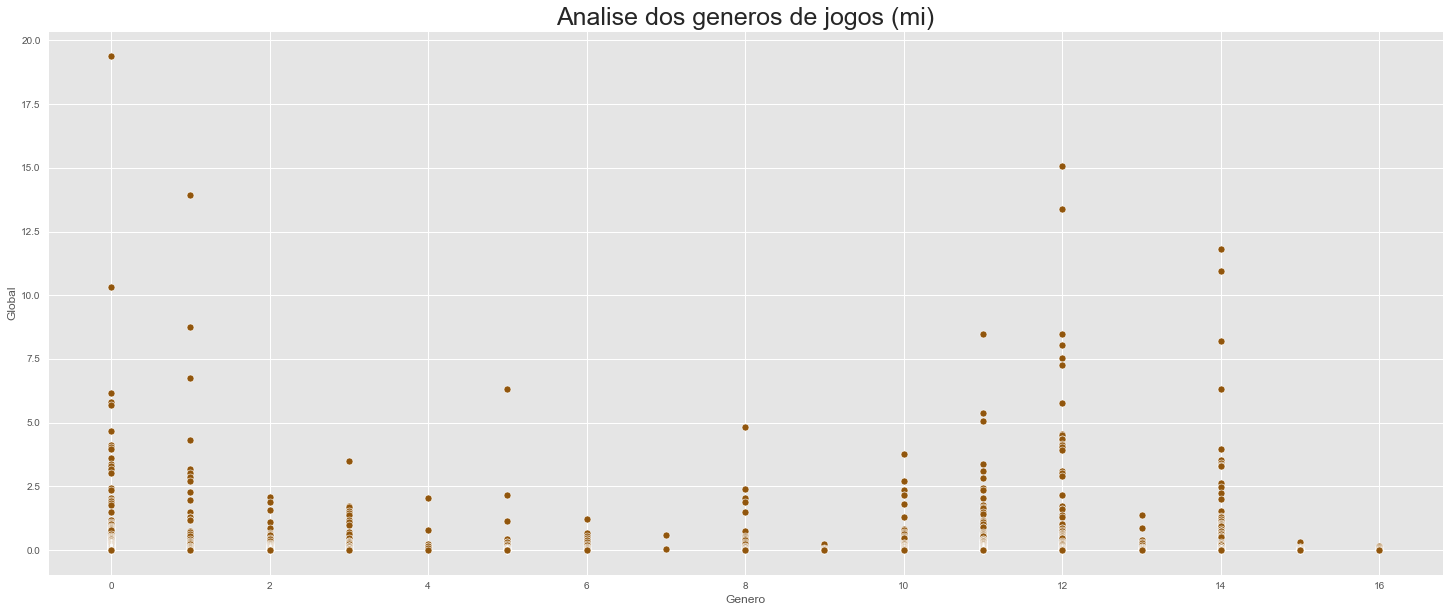

In [78]:
plt.figure(figsize= (25, 10))
plt.title('Analise dos generos de jogos (mi)', fontsize= 25)
sns.scatterplot(data= base_dados, 
                x= 'Genero', 
                y= 'Global', 
                color= paleta_cores[7]);

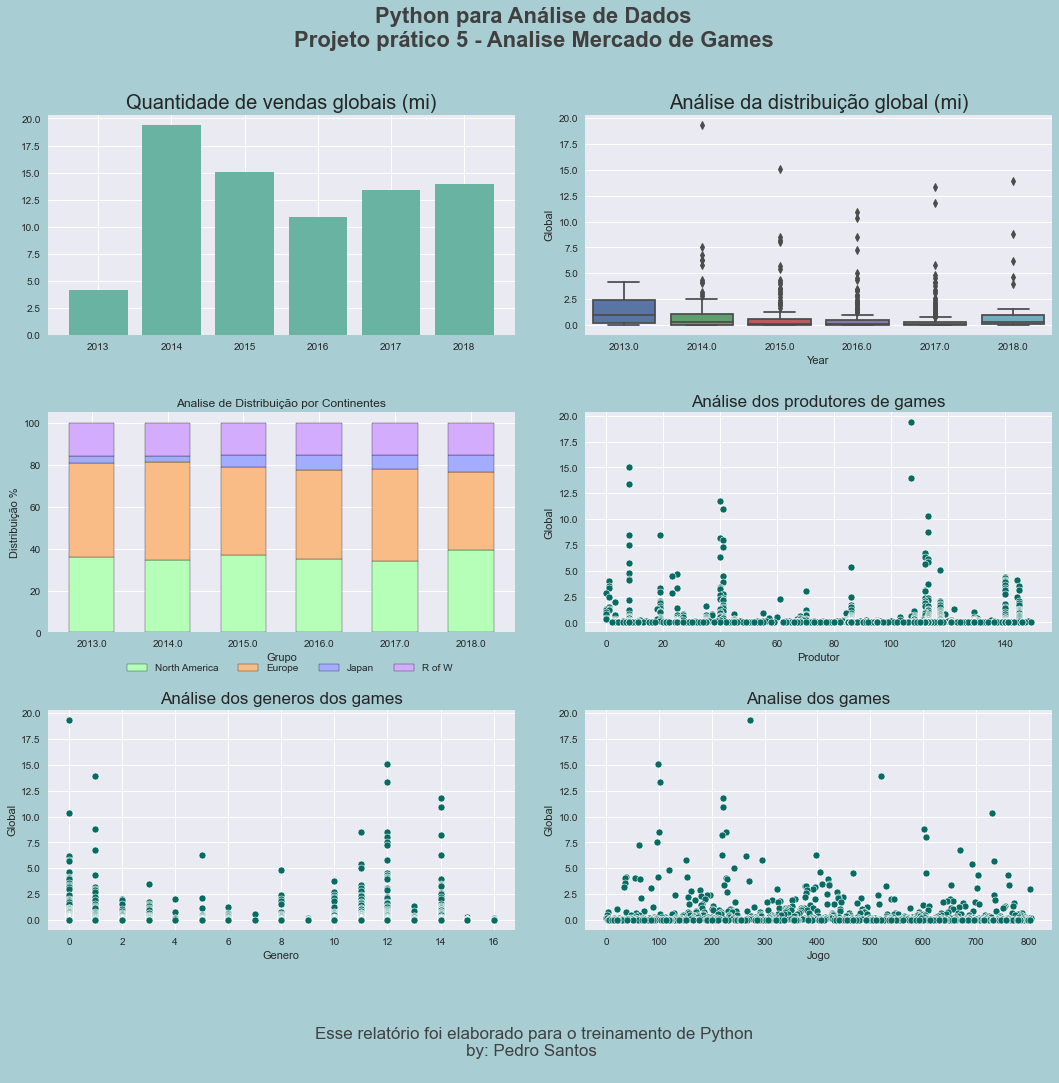

In [92]:
# Relatório -> Report de Informação

# Tamanho da Imagem
fig, ax = plt.subplots(figsize= (18,15))

# oor de fundo
cor_fundo = '#A8CED3'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# style do grafico
plt.style.use('seaborn')

plt.suptitle('Python para Análise de Dados\nProjeto prático 5 - Analise Mercado de Games',
             fontsize= 22,
             color= '#404040',
             fontweight= 600)

# parametros do grid
linhas = 3
colunas = 2

# grafico 1
plt.subplot(linhas, colunas, 1)
plt.title('Quantidade de vendas globais (mi)', fontsize= 20)
plt.bar(base_dados['Year'], base_dados['Global'],
            color= '#69B3A2')

# grafico 2
plt.subplot(linhas, colunas, 2)
plt.title('Análise da distribuição global (mi)', fontsize= 20)
sns.boxplot(data= base_dados, x= 'Year', y= 'Global')

# grafico 3
plt.subplot(linhas, colunas, 3)
#____
largura_barra = 0.6
rotulos = analise.Year
grupos = [0, 1, 2, 3, 4, 5]
plt.title('Analise de Distribuição por Continentes')

# plot america do norte
plt.bar(grupos, 
        america_do_norte, 
        width= largura_barra,
        color= '#B5FFB9',
        edgecolor= 'black')
# plot europa
plt.bar(grupos, 
        europa,
        bottom= america_do_norte,
        width= largura_barra,
        color= '#F9BC86',
        edgecolor= 'black')
# plot japão
plt.bar(grupos, 
        japao,
        bottom= [a + b for a, b in zip(america_do_norte, europa)],
        width= largura_barra,
        color= '#A3ACFF',
        edgecolor= 'black')
# plot resto do mundo
plt.bar(grupos, 
        resto_do_mundo,
        bottom= [a + b + c for a, b, c in zip(america_do_norte, europa, japao)],
        width= largura_barra,
        color= '#D3ACFE',
        edgecolor= 'black')

plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend(['North America', 'Europe','Japan', 'R of W'], loc= 'upper left',
           bbox_to_anchor= (0.15, -0.1), ncol=4);
#____

# grafico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise dos produtores de games', fontsize=17)
sns.scatterplot(data= base_dados, x='Produtor', y='Global', color= paleta_cores[0])

# grafico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise dos generos dos games', fontsize= 17)
sns.scatterplot(data= base_dados, x='Genero', y= 'Global', color= paleta_cores[0])

# grafico 6
plt.subplot(linhas, colunas, 6)
plt.title('Analise dos games', fontsize= 17)
sns.scatterplot(data= base_dados, x= 'Jogo', y='Global', color= paleta_cores[0])
plt.subplots_adjust(hspace= 0.35, wspace= 0.15)

#Rodapé
rodape = '''
Esse relatório foi elaborado para o treinamento de Python
by: Pedro Santos 
'''
fig.text(0.5,-0.01, rodape, ha= 'center',
         va= 'bottom', size= 17, color= '#404040');